## Team information
Names and student numbers of your team:<br>
Jair Emanuels, Student Nr. <br>
Frank Villano, Student Nr. 15090299<br>
Finn Mulder, Student Nr. 15338339<br>
Jonas Rosman, Student Nr. <br><br>
Group number of your team that is registered on Canvas:<br>
A4


# Introduction
Plastic recycling stands at the forefront of contemporary environmental discourse. Proponents, including governments and environmental agencies, advocate for recycling as a pivotal strategy to mitigate plastic pollution and manage waste sustainably. They argue that recycling plastic can significantly contribute to keeping the planet clean by diverting plastic waste from landfills and oceans, thus reducing the environmental footprint associated with plastic production and disposal. This approach aligns with global efforts to conserve natural resources and combat climate change by promoting a circular economy where materials are reused and repurposed.

However, there are dissenting voices within the discourse on plastic recycling. Critics argue that the effectiveness of recycling plastic is often overstated. They contend that while recycling can divert some plastic waste from disposal sites, it does not fundamentally address the root causes of plastic pollution or eliminate its negative environmental impacts. Moreover, there is concern that promoting recycling as a panacea for plastic pollution may inadvertently mislead the public and policymakers into believing that recycling alone can offset the detrimental effects of plastic consumption. This misconception could undermine broader efforts to reduce plastic production, improve product design for recyclability, and promote alternatives to single-use plastics.

In essence, the debate surrounding plastic recycling extends beyond its immediate environmental benefits to encompass broader questions about sustainability, resource management, and societal perceptions of waste. Achieving meaningful progress in addressing plastic pollution requires a balanced approach that acknowledges both the potential benefits and limitations of recycling, while also advocating for comprehensive strategies that prioritize waste reduction, innovation in materials science, and responsible consumption practices.


## The first perspective of the topic with arguments:
Recycling plastic is beneficial because it reduces plastic litter and conserves natural resources.

Recycling plastic causes a decrease in the amount of plastic that litters the planet. When plastic is recycled, it can be reused to create new products, reducing the need for virgin plastic production. This process helps to minimize the strain on the planet's ecosystems and biodiversity by reducing the amount of plastic waste that ends up in landfills, oceans, and natural habitats. Additionally, recycling conserves natural resources such as petroleum, which is a key component in plastic production. By extending the lifecycle of plastic through recycling, we can lessen our reliance on finite resources and lower greenhouse gas emissions associated with plastic manufacturing.

Recycling not only addresses the immediate problem of plastic waste but also supports a circular economy where materials are reused and recycled rather than discarded after a single use. This approach aligns with sustainable development goals by promoting responsible consumption and production patterns. Moreover, recycling initiatives encourage innovation in waste management technologies and promote awareness about the environmental impact of plastic consumption. Education and infrastructure development in recycling can further enhance these benefits by increasing recycling rates and improving the efficiency of plastic waste management systems globally.


## The second perspective of the topic with arguments:
Most plastic cannot be effectively recycled, leading to continued environmental harm despite recycling efforts.

Most plastic items cannot be recycled due to various factors such as contamination, lack of recycling facilities, and the complex nature of plastic polymers. As a result, even if individuals and businesses participate in recycling programs, a significant amount of plastic waste ends up in landfills, incinerators, or the natural environment. Misconceptions about the recyclability of plastic may lead to complacency among consumers and policymakers, who may falsely believe that recycling alone can solve the plastic pollution crisis. This misplaced belief could divert attention and resources away from more effective solutions such as reducing plastic consumption, redesigning products for recyclability, and investing in sustainable alternatives to plastic.

Recycling initiatives often face challenges such as low collection rates, inefficient sorting processes, and limited markets for recycled materials. These challenges undermine the effectiveness of recycling as a strategy for reducing plastic pollution. Moreover, the global recycling infrastructure is unevenly distributed, with many regions lacking adequate facilities and policies to support comprehensive recycling programs. As a result, significant quantities of plastic waste continue to accumulate in the environment, contributing to marine pollution, habitat degradation, and threats to wildlife. Addressing these systemic barriers requires coordinated efforts from governments, businesses, and communities to improve waste management practices, promote eco-friendly alternatives, and raise awareness about the limitations of recycling as a sole solution to the plastic crisis.


# Description of the datasets and how they will be preprocessed:
We have access to two essential datasets for our analysis. The first dataset provides a comprehensive record of global plastic production on an annual basis. To ensure relevance to our research objectives, we will meticulously filter this dataset to focus solely on specific years of interest. This selective approach allows us to examine trends and patterns in plastic production over time, providing valuable insights into the environmental impact and sustainability challenges associated with plastic consumption.

The second dataset offers a detailed overview of global plastic waste management practices. It encompasses information regarding the destinations of plastic waste worldwide, along with detailed metrics on the types and quantities of plastics used or produced globally. Additionally, this dataset includes data on the recyclability characteristics of different plastic types, categorizing them into three distinct groups: plastics that can be recycled once, plastics suitable for multiple recycling cycles, and plastics that are non-recyclable. This categorization will enable us to analyze the effectiveness of current recycling initiatives.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

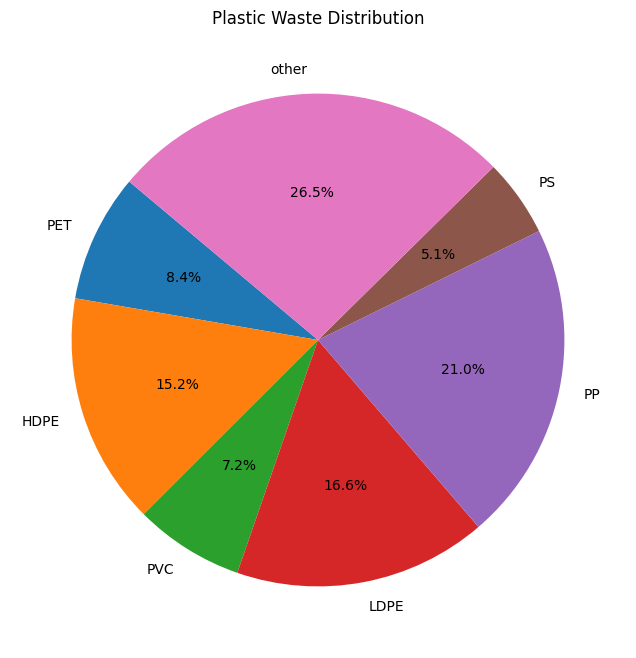

In [2]:
df = pd.read_csv('wastegeneration.csv')
df = df[df['Polymer type'] != 'total all']

categories = df['Polymer type']
values = df['% wasted'].str.rstrip('%').astype(float)

valid_data = ~values.isna()
categories = categories[valid_data]
values = values[valid_data]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Plastic Waste Distribution')
plt.show()

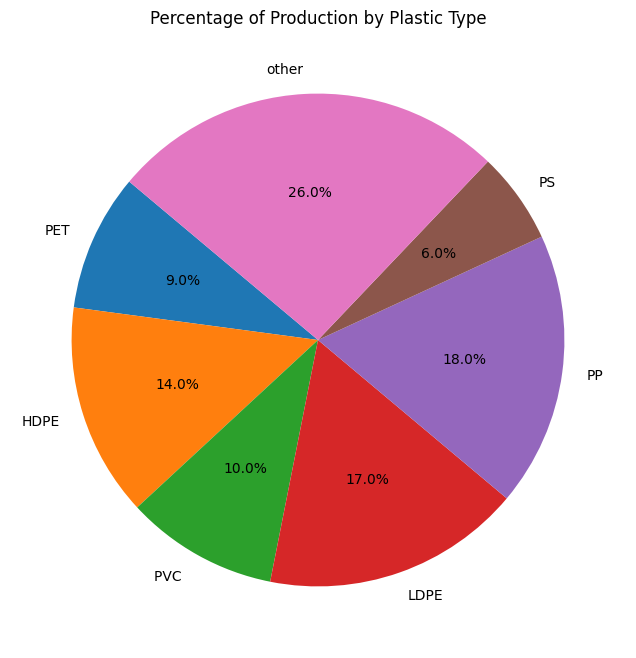

In [3]:
df = pd.read_csv('maintypes.csv')


plastic_columns = ['PET', 'HDPE', 'PVC ', 'LDPE', 'PP', 'PS', 'other']
names = plastic_columns


production = df.loc[df['abbr'] == '% of production', plastic_columns].values.flatten()

production = [float(p.strip('%')) for p in production]


plt.figure(figsize=(8, 8))
plt.pie(production, labels=names, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Production by Plastic Type')
plt.show()

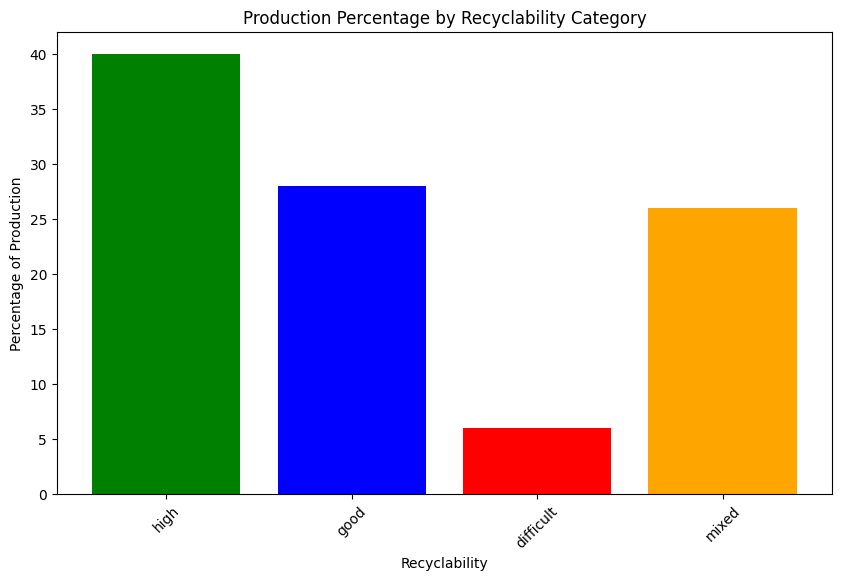

In [8]:
df = pd.read_csv('maintypes.csv')


df.columns = df.columns.str.strip()


recyclability_row = df[df['abbr'] == 'recyclability?']
production_row = df[df['abbr'] == '% of production']


plastic_columns = ['PET', 'HDPE', 'PVC', 'LDPE', 'PP', 'PS', 'other']
plastic_columns = [col.strip() for col in plastic_columns]

recyclability_values = recyclability_row[plastic_columns].values.flatten()
production_values = production_row[plastic_columns].values.flatten()
production_values = [float(p.strip('%')) for p in production_values]

data = pd.DataFrame({
    'recyclability': recyclability_values,
    'production': production_values
})

grouped_data = data.groupby('recyclability').sum().reset_index()

categories = ['high', 'good', 'difficult', 'mixed']

grouped_data['recyclability'] = pd.Categorical(grouped_data['recyclability'], categories=categories, ordered=True)
grouped_data = grouped_data.sort_values('recyclability')

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['recyclability'], grouped_data['production'], color=['green', 'blue', 'red', 'orange'])

plt.xlabel('Recyclability')
plt.ylabel('Percentage of Production')
plt.title('Production Percentage by Recyclability Category')
plt.xticks(rotation=45)
plt.show()

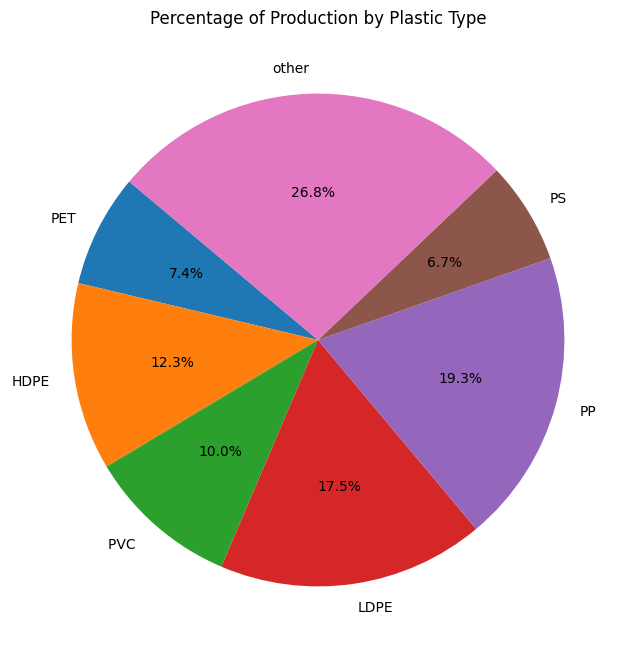

In [5]:
#4 
#https://docs.google.com/spreadsheets/d/1uN5TA8uq5nkzuPjSXFk9ib7jZ72-xw_muu0H0qb16pc/edit?gid=757752788#gid=757752788
df = pd.read_csv('maintypes.csv')


plastic_columns = ['PET', 'HDPE', 'PVC ', 'LDPE', 'PP', 'PS', 'other']
names = plastic_columns


production = df.loc[df['abbr'] == 'usage', plastic_columns].values.flatten()

production = [float(p.strip('%')) for p in production]


plt.figure(figsize=(8, 8))
plt.pie(production, labels=names, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Production by Plastic Type')
plt.show()

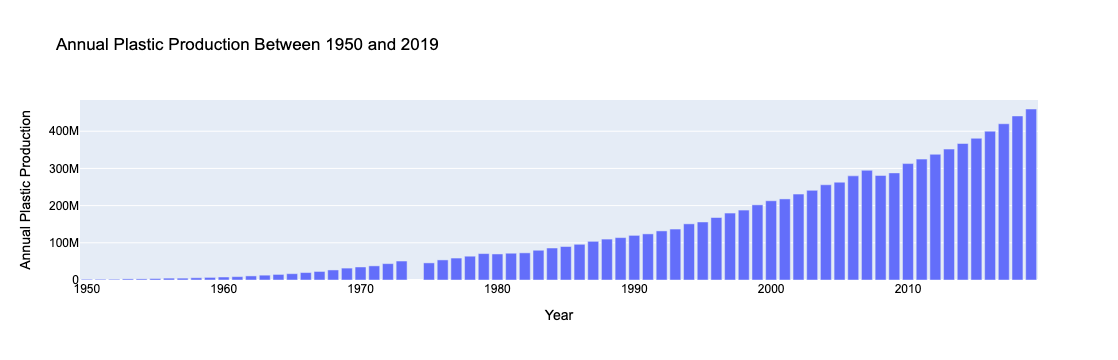

In [6]:
df = pd.read_csv('globalproduction.csv')

trace = go.Bar(
    x = df['Year'],
    y = df['Annual plastic production between 1950 and 2019']
)

fig = go.Figure(trace)

fig.update_layout(
    title='Annual Plastic Production Between 1950 and 2019',  # Add your title here
    xaxis_title='Year',
    yaxis_title='Annual Plastic Production',
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)
fig.show()

In [7]:
df = pd.read_csv('ended_up.csv')

categories = df['Total plastic']
values = df['billion tonnes']

values = values.str.rstrip('%').astype(float)
valid_data = ~values.isna()
categories = categories[valid_data]
values = values[valid_data]
labels = [f'{cat} ({val}%)' for cat, val in zip(categories, values)]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, textprops={'color': 'none'})

plt.title('Where plastics have ended up')

plt.legend(labels, title="Where plastics have ended up", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()